In [3]:
%%time

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
import plotly as py
from plotly.offline import iplot
import scipy as sp
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings 
warnings.filterwarnings('ignore')

adult_income = pd.read_csv('adult_data.csv')
adult_income.head(33000)

CPU times: total: 31.2 ms
Wall time: 45.9 ms


,Age,Work_Class,Annual_Income,Education,Education_Level,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_Country,Income_Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
%%time

adult_income.describe()

CPU times: total: 0 ns
Wall time: 37 ms


,Age,Annual_Income,Education_Level,Capital_Gain,Capital_Loss,Hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
%%time

#dropping rows with '?'
adult_income.loc[adult_income.Work_Class=='?']
adult_income.drop(adult_income[adult_income['Work_Class'] == '?'].index,inplace=True)
adult_income['Work_Class'].unique()

CPU times: total: 0 ns
Wall time: 27.9 ms


array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [6]:
%%time

#dropping rows with '?'
adult_income.loc[adult_income.Annual_Income=='?']
adult_income.drop(adult_income[adult_income['Annual_Income'] == '?'].index,inplace=True)
adult_income['Annual_Income'].unique()

CPU times: total: 0 ns
Wall time: 15.5 ms


array([ 77516,  83311, 215646, ...,  84661, 257302, 201490], dtype=int64)

In [7]:
%%time

#dropping rows with '?'
adult_income.loc[adult_income.Occupation=='?']
adult_income.drop(adult_income[adult_income['Occupation'] == '?'].index,inplace=True)
adult_income['Occupation'].unique()

CPU times: total: 0 ns
Wall time: 9.19 ms


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [8]:
%%time

#dropping rows with '?'
adult_income.loc[adult_income.Native_Country=='?']
adult_income.drop(adult_income[adult_income['Native_Country'] == '?'].index,inplace=True)
adult_income['Native_Country'].unique()

CPU times: total: 0 ns
Wall time: 22.3 ms


array(['United-States', 'Cuba', 'Jamaica', 'India', 'Mexico',
       'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany', 'Iran',
       'Philippines', 'Poland', 'Columbia', 'Cambodia', 'Thailand',
       'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'Italy', 'China', 'South', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [9]:
%%time

#checking number of records after dropping the missing data
adult_income.head(33000)

CPU times: total: 0 ns
Wall time: 0 ns


,Age,Work_Class,Annual_Income,Education,Education_Level,Marital_Status,Occupation,Relationship,Race,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Native_Country,Income_Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


CPU times: total: 46.9 ms
Wall time: 174 ms


<=50K    22654
>50K      7508
Name: Income_Target, dtype: int64

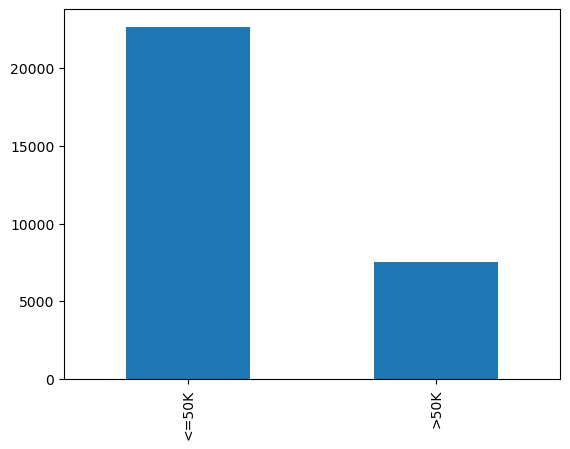

In [10]:
%%time

adult_income['Income_Target'].value_counts().plot(kind='bar')
adult_income['Income_Target'].value_counts()

CPU times: total: 438 ms
Wall time: 666 ms


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Transport-moving'),
  Text(7, 0, 'Farming-fishing'),
  Text(8, 0, 'Machine-op-inspct'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Craft-repair'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

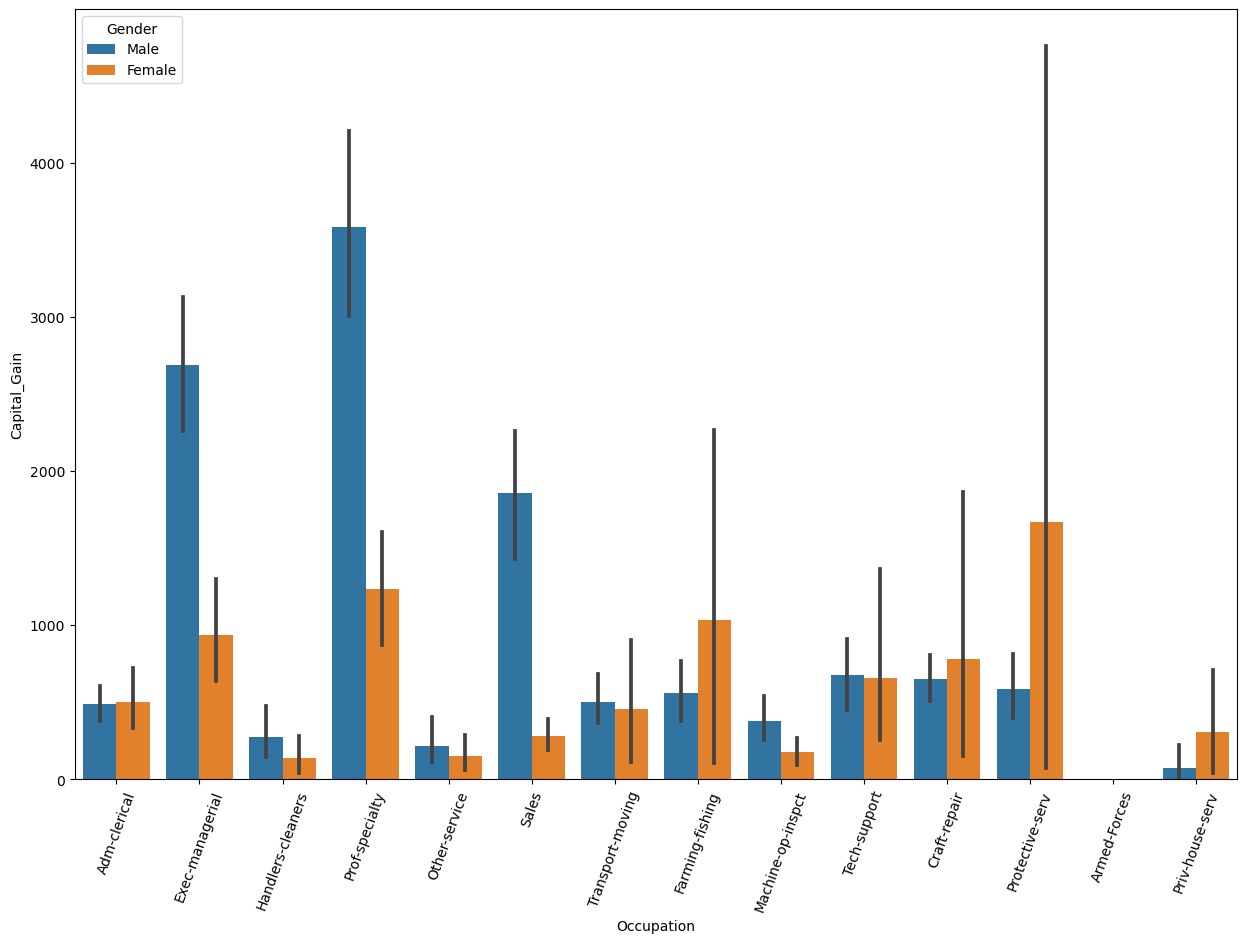

In [11]:
%%time 

#Checking the distribution of Capital_gain and  Occupation as per gender
plt.figure(figsize=(15,10))
sns.barplot(x='Occupation',y='Capital_Gain',data=adult_income,hue='Gender')
plt.xticks(rotation=70)

CPU times: total: 406 ms
Wall time: 681 ms


<Axes: xlabel='Education', ylabel='Hours_per_week'>

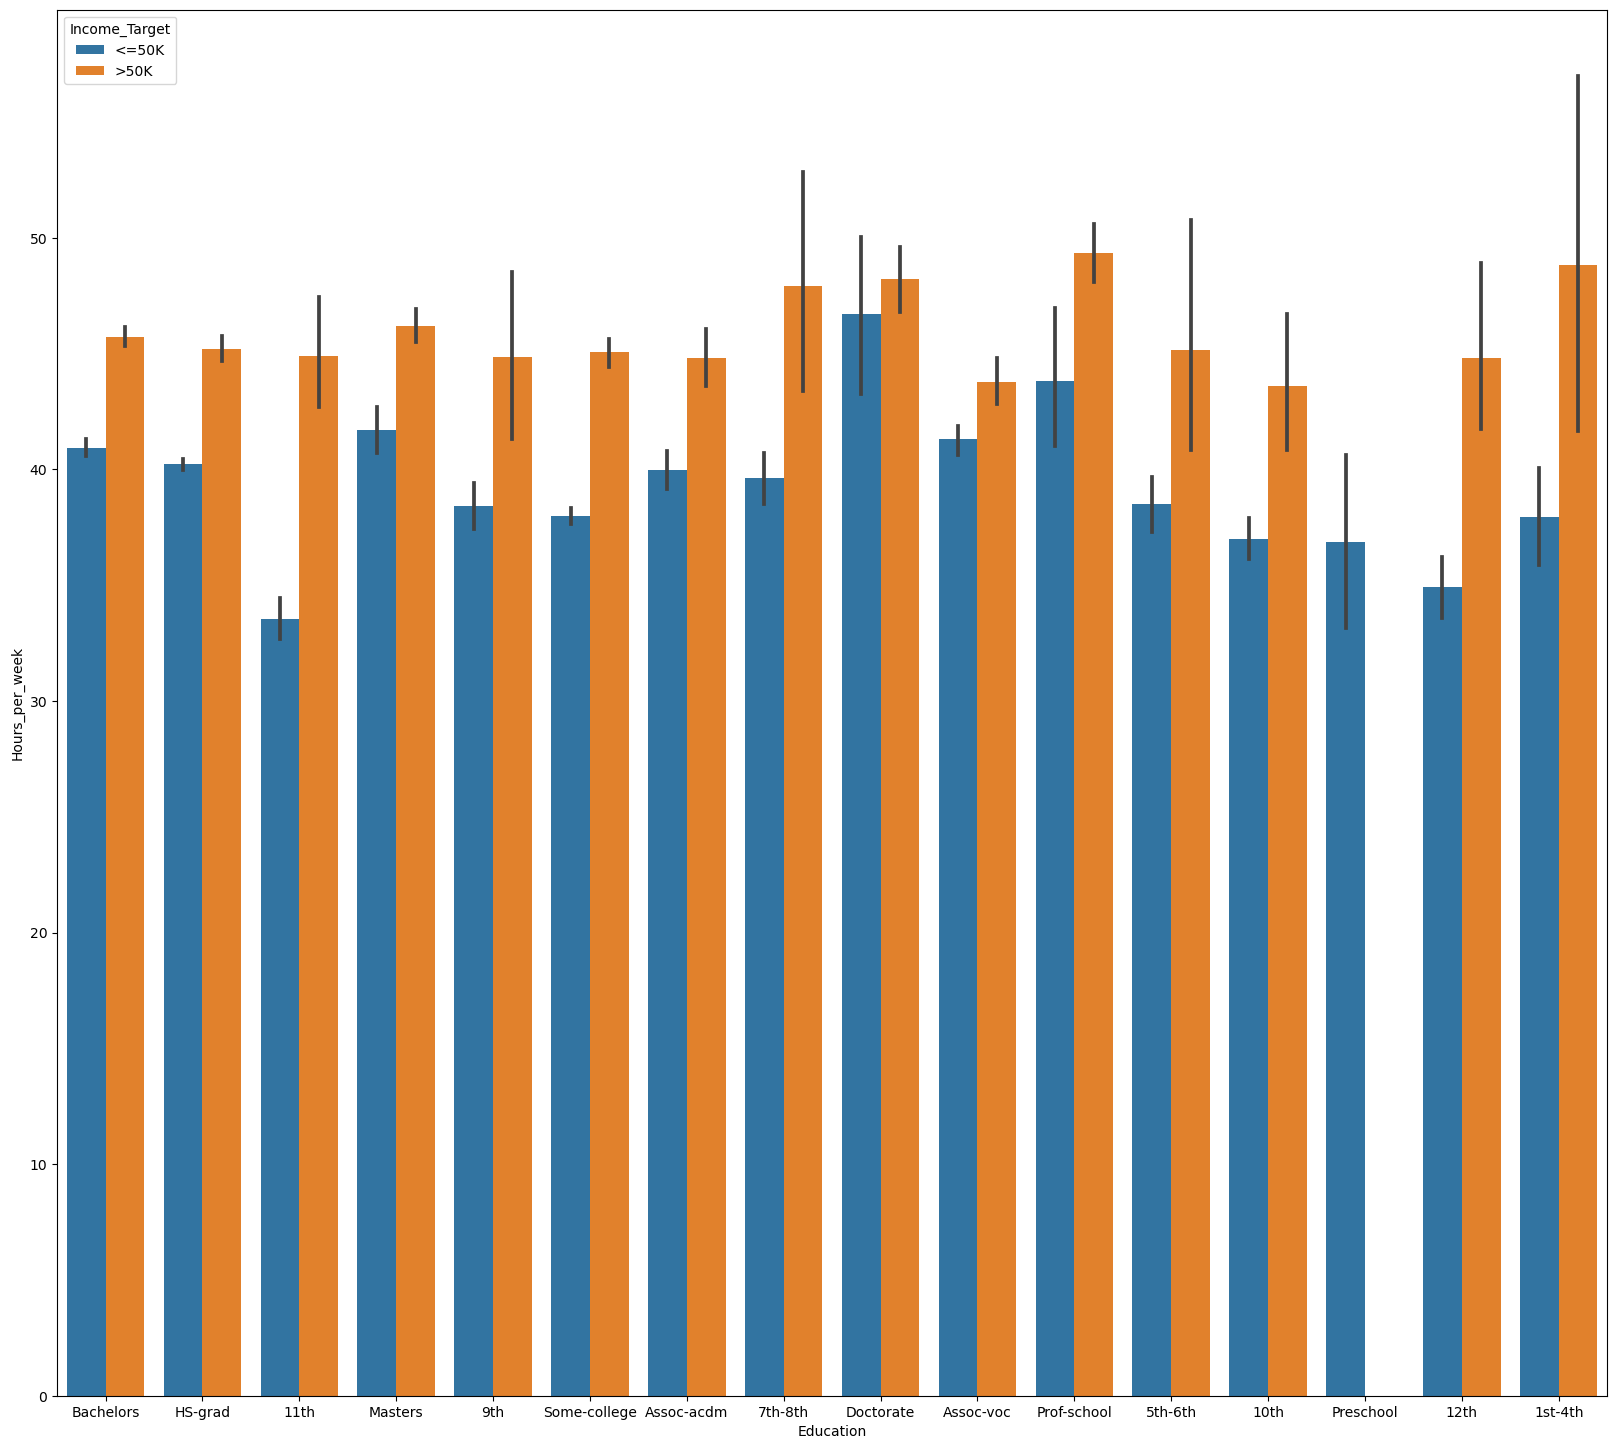

In [12]:
%%time

#Checking the distribution of Education and  Hours_per_week as gender
plt.figure(figsize=(20,18))
sns.barplot(x='Education',y='Hours_per_week',data=adult_income,hue='Income_Target')

In [13]:
%%time

le = LabelEncoder() # label encoder 
adult_income['Income_Target']=le.fit_transform(adult_income['Income_Target'])
adult_income['Gender']=le.fit_transform(adult_income['Gender'])
#Converting 2 columns into binary 
adult_income = pd.get_dummies(adult_income,drop_first=True)
pd.set_option('display.max_columns',100)#to display all columns

adult_income.head(33000)

CPU times: total: 0 ns
Wall time: 63.8 ms


,Age,Annual_Income,Education_Level,Gender,Capital_Gain,Capital_Loss,Hours_per_week,Income_Target,Work_Class_Local-gov,Work_Class_Private,Work_Class_Self-emp-inc,Work_Class_Self-emp-not-inc,Work_Class_State-gov,Work_Class_Without-pay,Education_11th,Education_12th,Education_1st-4th,Education_5th-6th,Education_7th-8th,Education_9th,Education_Assoc-acdm,Education_Assoc-voc,Education_Bachelors,Education_Doctorate,Education_HS-grad,Education_Masters,Education_Preschool,Education_Prof-school,Education_Some-college,Marital_Status_Married-AF-spouse,Marital_Status_Married-civ-spouse,Marital_Status_Married-spouse-absent,Marital_Status_Never-married,Marital_Status_Separated,Marital_Status_Widowed,Occupation_Armed-Forces,Occupation_Craft-repair,Occupation_Exec-managerial,Occupation_Farming-fishing,Occupation_Handlers-cleaners,Occupation_Machine-op-inspct,Occupation_Other-service,Occupation_Priv-house-serv,Occupation_Prof-specialty,Occupation_Protective-serv,Occupation_Sales,Occupation_Tech-support,Occupation_Transport-moving,Relationship_Not-in-family,Relationship_Other-relative,Relationship_Own-child,Relationship_Unmarried,Relationship_Wife,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,Native_Country_Canada,Native_Country_China,Native_Country_Columbia,Native_Country_Cuba,Native_Country_Dominican-Republic,Native_Country_Ecuador,Native_Country_El-Salvador,Native_Country_England,Native_Country_France,Native_Country_Germany,Native_Country_Greece,Native_Country_Guatemala,Native_Country_Haiti,Native_Country_Holand-Netherlands,Native_Country_Honduras,Native_Country_Hong,Native_Country_Hungary,Native_Country_India,Native_Country_Iran,Native_Country_Ireland,Native_Country_Italy,Native_Country_Jamaica,Native_Country_Japan,Native_Country_Laos,Native_Country_Mexico,Native_Country_Nicaragua,Native_Country_Outlying-US(Guam-USVI-etc),Native_Country_Peru,Native_Country_Philippines,Native_Country_Poland,Native_Country_Portugal,Native_Country_Puerto-Rico,Native_Country_Scotland,Native_Country_South,Native_Country_Taiwan,Native_Country_Thailand,Native_Country_Trinadad&Tobago,Native_Country_United-States,Native_Country_Vietnam,Native_Country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,1,0,0,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3255

In [14]:
%%time

scaler = StandardScaler()
train_col_sacle = adult_income[['Age','Annual_Income','Education_Level','Hours_per_week']]
train_scaler_col = scaler.fit_transform(train_col_sacle)
train_scaler_col = pd.DataFrame(train_scaler_col,columns=train_col_sacle.columns)
adult_income['Age']= train_scaler_col['Age']
adult_income['Annual_Income']= train_scaler_col['Annual_Income']
adult_income['Education_Level']= train_scaler_col['Education_Level']
adult_income['Hours_per_week']= train_scaler_col['Hours_per_week']

CPU times: total: 0 ns
Wall time: 25.9 ms


In [15]:
%%time

X = adult_income.drop(['Income_Target'],axis=1)
y = adult_income['Income_Target']

CPU times: total: 0 ns
Wall time: 5.01 ms


In [16]:
%%time

X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size=0.30, random_state=11)

CPU times: total: 0 ns
Wall time: 15.6 ms


In [17]:
%%time

#KNearest Neighbour
knn50=KNeighborsClassifier(50)
knn30=KNeighborsClassifier(30)
knn10=KNeighborsClassifier(10)
knn5=KNeighborsClassifier(5)
knn1=KNeighborsClassifier(1)
print("Model is created")

Model is created
CPU times: total: 0 ns
Wall time: 0 ns


In [18]:
%%time

X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

knn50.fit(X_train,y_train)
knn30.fit(X_train,y_train)
knn10.fit(X_train,y_train)
knn5.fit(X_train,y_train)
knn1.fit(X_train,y_train)
print("Model is trained")

Model is trained
CPU times: total: 31.2 ms
Wall time: 59.2 ms


In [19]:
%%time

print("knn50 classification score",knn50.score(X_train.values,y_train))
print("knn30 classification score",knn30.score(X_train.values,y_train))
print("knn10 classification score",knn10.score(X_train.values,y_train))
print("knn5 classification score",knn5.score(X_train.values,y_train))
print("knn1 classification score",knn1.score(X_train.values,y_train))

knn classification score 0.8515606498365935
knn classification score 0.8598493818974092
knn classification score 0.8704589589352532
knn classification score 0.8866101454080424
knn classification score 0.9931321934353242
CPU times: total: 35.3 s
Wall time: 5.39 s


In [21]:
%%time

X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

knn50_yprad = knn50.predict(X_test.values)
knn30_yprad = knn30.predict(X_test.values)
knn10_yprad = knn10.predict(X_test.values)
knn5_yprad = knn5.predict(X_test.values)
knn1_yprad = knn1.predict(X_test.values)

CPU times: total: 25.8 s
Wall time: 2.94 s


In [22]:
%%time

knn50_conf_mat = confusion_matrix(y_test,knn50_yprad)
print("confusion matrix for knn50_model",'\n',knn50_conf_mat)
knn30_conf_mat = confusion_matrix(y_test,knn30_yprad)
print("confusion matrix for knn30_model",'\n',knn30_conf_mat)
knn10_conf_mat = confusion_matrix(y_test,knn10_yprad)
print("confusion matrix for knn10_model",'\n',knn10_conf_mat)
knn5_conf_mat = confusion_matrix(y_test,knn5_yprad)
print("confusion matrix for knn5_model",'\n',knn5_conf_mat)
knn1_conf_mat = confusion_matrix(y_test,knn1_yprad)
print("confusion matrix for knn1_model",'\n',knn1_conf_mat)

confusion matrix for knn_model 
 [[6393  382]
 [ 963 1311]]
confusion matrix for knn_model 
 [[6409  366]
 [ 941 1333]]
confusion matrix for knn_model 
 [[6431  344]
 [1004 1270]]
confusion matrix for knn_model 
 [[6172  603]
 [ 878 1396]]
confusion matrix for knn_model 
 [[5911  864]
 [ 843 1431]]
CPU times: total: 15.6 ms
Wall time: 19.7 ms


In [23]:
%%time

knn50_report = classification_report(y_test,knn50_yprad)
print(" knn50 classification_report" ,'\n',knn50_report)
knn30_report = classification_report(y_test,knn30_yprad)
print(" knn30 classification_report" ,'\n',knn30_report)
knn10_report = classification_report(y_test,knn10_yprad)
print(" knn10 classification_report" ,'\n',knn10_report)
knn5_report = classification_report(y_test,knn5_yprad)
print(" knn5 classification_report" ,'\n',knn5_report)
knn1_report = classification_report(y_test,knn1_yprad)
print(" knn1 classification_report" ,'\n',knn1_report)

 knn50 classification_report 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      6775
           1       0.77      0.58      0.66      2274

    accuracy                           0.85      9049
   macro avg       0.82      0.76      0.78      9049
weighted avg       0.85      0.85      0.84      9049

 knn30 classification_report 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6775
           1       0.78      0.59      0.67      2274

    accuracy                           0.86      9049
   macro avg       0.83      0.77      0.79      9049
weighted avg       0.85      0.86      0.85      9049

 knn10 classification_report 
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      6775
           1       0.79      0.56      0.65      2274

    accuracy                           0.85      9049
   macro avg       0.83      0.75  

In [24]:
%%time

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import RocCurveDisplay
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

#importing the ric and auc from sklearn and predect the x_test and 
#checking the roc_auc_score
print(roc_auc_score(y_test,knn50.predict(X_test.values)))
print(roc_auc_score(y_test,knn30.predict(X_test.values)))
print(roc_auc_score(y_test,knn10.predict(X_test.values)))
print(roc_auc_score(y_test,knn5.predict(X_test.values)))
print(roc_auc_score(y_test,knn1.predict(X_test.values)))

0.7600666932790701
0.7660847962041626
0.7538561696962617
0.7624462640404769
0.750879961833919
CPU times: total: 26.7 s
Wall time: 3.03 s


CPU times: total: 49.1 s
Wall time: 4.48 s


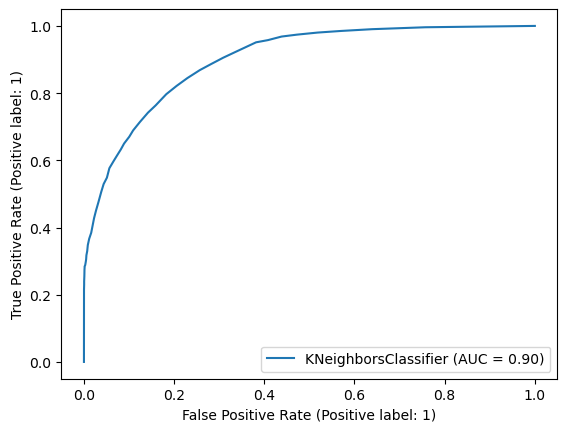

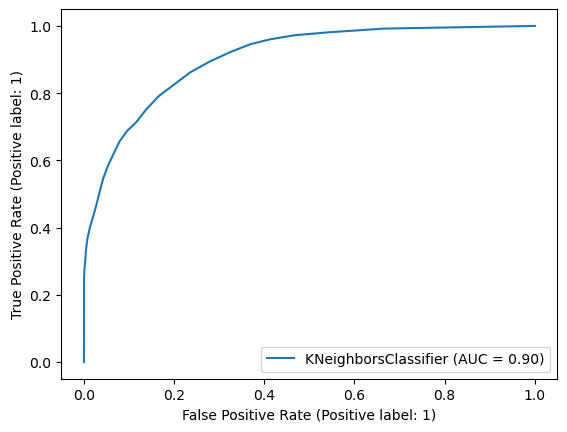

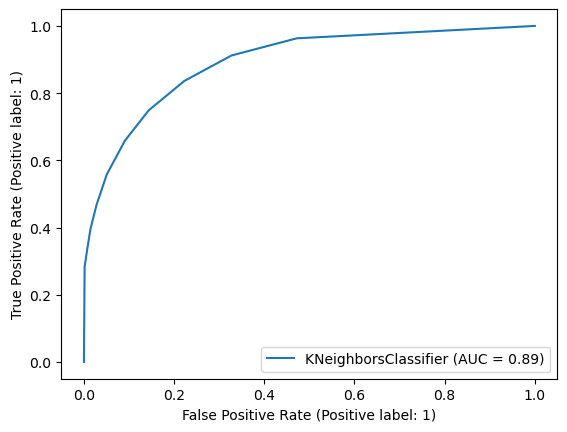

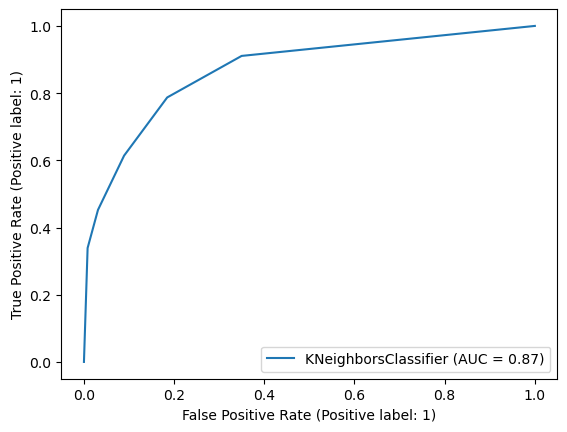

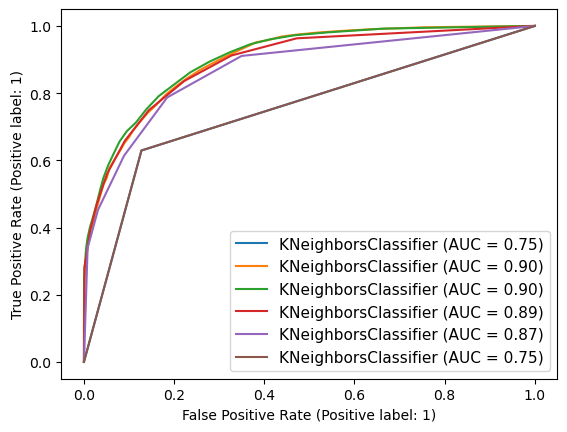

In [36]:
%%time

#lets find roc curve to check best fittted model
disp = RocCurveDisplay.from_estimator(knn50,X_test.values,y_test)
disp = RocCurveDisplay.from_estimator(knn30,X_test.values,y_test)
disp = RocCurveDisplay.from_estimator(knn10,X_test.values,y_test)
disp = RocCurveDisplay.from_estimator(knn5,X_test.values,y_test)
disp = RocCurveDisplay.from_estimator(knn1,X_test.values,y_test)

# here ax_ for axis with confustion matrics
RocCurveDisplay.from_estimator(knn50,X_test.values,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(knn30,X_test.values,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(knn10,X_test.values,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(knn5,X_test.values,y_test,ax=disp.ax_)
RocCurveDisplay.from_estimator(knn1,X_test.values,y_test,ax=disp.ax_)

plt.legend(prop = {'size':11}, loc ='lower right')